### Case Study 3 : Textual analysis of movie reviews

** Due Date: April 6, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** 

    Branden Diniz
    
    Xuanyu Li
    
    Dennis Silva
    
    Chuxin Wei

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [43]:
"""Script to download the movie review dataset"""

import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"


if not os.path.exists(DATA_FOLDER): # if path doesn't exist, create and download
    
    print("Dataset path does not exist")
    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)

print("Dataset '%s' Downloaded" % DATA_FOLDER)


Dataset 'txt_sentoken' Downloaded


In [45]:
"""Create training and testing subsets of movie reviews"""

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_files
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# params
# testSize: Number 0-1, percent size of testing set
testSize = 0.25
# ran_seed: Random number generation seed, keeps all our data same.
#       Change to 'None' if want different training/test subsets
ran_seed = 1


 # the training data folder must be passed as first argument
movie_reviews_data_folder = DATA_FOLDER
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("number of total samples:    %d" % len(dataset.data))

# split the dataset in training and test set:
#  Test size set to 25% of the data, random_state set to 1 for random seed
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=testSize, random_state=ran_seed)
print("number of training samples: %d" % len(docs_train))
print("number of testing samples:  %d" % len(docs_test))


print("Creation of Training/Testing Subsets Done")

number of total samples:    2000
number of training samples: 1500
number of testing samples:  500
Creation of Training/Testing Subsets Done


In [55]:
""" Creates classifier pipeline and finds whether unigrams or bigrams are better"""



from pprint import pprint
from time import time

# NOTE: Params here are from tutorial, params will be experimented with in 
#       the following problems. This is used to get understanding.

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)), # how to vectorize text data
    ('clf', LinearSVC(C=1000)), # what algorithm to use
])

# TASK: Build a grid search to find out whether unigrams (words) or bigrams are
# more useful. 
#    NOTE: This will take a while to run, can change n_jobs if possible

# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print
print("parameters:")
pprint(parameters)
t0 = time() # start timer

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1) # conduct grid search
grid_search.fit(docs_train, y_train) # train the model here

print
print("completed grid search in %0.3fs" % (time() - t0))

Performing grid search...
('pipeline:', ['vect', 'clf'])

parameters:
{'vect__ngram_range': [(1, 1), (1, 2)]}

completed grid search in 56.487s


In [54]:
"""Computes various evaluation data from gridsearch"""

# TASK: print the cross-validated scores for the each parameters set
# explored by the grid search
print("Cross-validated Scores:")
print(grid_search.grid_scores_ )
print

# TASK: print best score found
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameter set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))
print

# Print and plot the confusion matrix
print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

Cross-validated Scores:
[mean: 0.84067, std: 0.02509, params: {'vect__ngram_range': (1, 1)}, mean: 0.84667, std: 0.01794, params: {'vect__ngram_range': (1, 2)}]

Best score: 0.847
Best parameter set:
	vect__ngram_range: (1, 2)

Classification Report:
             precision    recall  f1-score   support

        neg       0.88      0.84      0.86       255
        pos       0.84      0.88      0.86       245

avg / total       0.86      0.86      0.86       500


Confusion Matrix:
[[214  41]
 [ 29 216]]


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

**Define the term frequency–inverse document frequency (TF-IDF) statistic:**

term frequency (tf):
    The number of times a term (token) occurs in a document.

inverse document frequency (idf):
    A factor that when incorporated, diminishes the weight of a term (token) that occur very frequently in the document and increase the weight of terms that occur rarely.

term frequency-inverse document frequency (tf-idf):
    A numerical statistic that reflects how important a word is to a document in a collection. Provides balance between common and rare term importance. Is the multiplication of tf and idf. Ranges from 0 (not important) to 1 (very important). 

** Define min_df, max_df, and ngram_range parameters of TfidVectorizer:**

TfidVectorizer: Converts a collection of raw documents to a matrix of TF-IDF features. Each row is a document and each column is a feature (ngram).

min_df: When building a vocabulary (set of all ngrams), all terms with tf strictly less than this cut off will be ignored. If min_df is a float between 0.0 and 1.0, all terms that occur less than min_df percent of all documents will be ignored. If min_df is an integer all terms that occur in count less than min_df will be ignored.

max_df: When building a vocabulary (set of all ngrams), all terms with tf strictly greater than this cut off will be ignored. If max_df is a float between 0.0 and 1.0, all terms that occur greater than max_df percent of all documents will be ignored. If man_df is an integer all terms that occur in count less than max_df will be ignored.

ngram_range: The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used. In other words, the number of words to consider as a term or object from each document.

In [289]:
""" Runs TfidVectorizer class over different parameters"""

from sklearn.feature_extraction.text import TfidfVectorizer

# Run TfidVectorizer on training data, no additional parameters
min_df = 1 # default parameters
max_df = 1.0
vectorizer = TfidfVectorizer()
tfidMat = vectorizer.fit_transform(docs_train)
print ("TF-IDF matrix has %d documents" % tfidMat.shape[0])
print
print("Starting tests on default parameters...\n")
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))


# explore min_df
print("Starting tests on min_df parameter...\n")
min_df = 3
max_df = 1.0
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))

min_df = 4
max_df = 1.0
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))



min_df = 5
max_df = 1.0
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))



min_df = 10
max_df = 1.0
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))


min_df = 25
max_df = 1.0
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))


min_df = 50
max_df = 1.0
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))

min_df = 100
max_df = 1.0
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))

print ("Done")


TF-IDF matrix has 1500 documents

Starting tests on default parameters...

min_df = 1, max_df = 1.000000 provides: 
   35542 features totaling 500167 non-zero elements 

Starting tests on min_df parameter...

min_df = 3, max_df = 1.000000 provides: 
   16047 features totaling 475692 non-zero elements 

min_df = 4, max_df = 1.000000 provides: 
   13172 features totaling 467067 non-zero elements 

min_df = 5, max_df = 1.000000 provides: 
   11233 features totaling 459311 non-zero elements 

min_df = 10, max_df = 1.000000 provides: 
   6715 features totaling 429698 non-zero elements 

min_df = 25, max_df = 1.000000 provides: 
   3137 features totaling 375598 non-zero elements 

min_df = 50, max_df = 1.000000 provides: 
   1694 features totaling 325931 non-zero elements 

min_df = 100, max_df = 1.000000 provides: 
   844 features totaling 267074 non-zero elements 

Done


In [293]:
# explore maX_df
print("Starting tests on max_df parameter...\n")
min_df = 1
max_df = 0.90
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))


min_df = 1
max_df = 0.50
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))


min_df = 1
max_df = 0.1
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))

min_df = 1
max_df = 0.05
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))

min_df = 1
max_df = 0.01
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))

min_df = 1
max_df = 0.005
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))

min_df = 1
max_df = 0.001
vectorizer = TfidfVectorizer(min_df = min_df, max_df = max_df)
tfidMat = vectorizer.fit_transform(docs_train)
print("min_df = %d, max_df = %f provides: \n   %d features totaling %d non-zero elements \n" 
          % (min_df, max_df,tfidMat.shape[1], tfidMat.size))

print("Done")

Starting tests on max_df parameter...

min_df = 1, max_df = 0.900000 provides: 
   35528 features totaling 479637 non-zero elements 

min_df = 1, max_df = 0.500000 provides: 
   35465 features totaling 415039 non-zero elements 

min_df = 1, max_df = 0.100000 provides: 
   35000 features totaling 270344 non-zero elements 

min_df = 1, max_df = 0.050000 provides: 
   34419 features totaling 208865 non-zero elements 

min_df = 1, max_df = 0.010000 provides: 
   30922 features totaling 95990 non-zero elements 

min_df = 1, max_df = 0.005000 provides: 
   27606 features totaling 60153 non-zero elements 

min_df = 1, max_df = 0.001000 provides: 
   14515 features totaling 14515 non-zero elements 

Done


In [86]:
# Explore the ngram_range parameter of TfidVectorizer. 
print("Starting Tests on ngram_range parameter...")
print("Note: This may take awhile...\n")

ngram_range = (1,1)
vectorizer = TfidfVectorizer(ngram_range = ngram_range)
tfidMat = vectorizer.fit_transform(docs_train)
print("ngram_range = %s provides: \n   %d features totaling %d non-zero elements \n" 
      % (ngram_range, tfidMat.shape[1], tfidMat.size))

ngram_range = (1,2)
vectorizer = TfidfVectorizer(ngram_range = ngram_range)
tfidMat = vectorizer.fit_transform(docs_train)
print("ngram_range = %s provides: \n   %d features totaling %d non-zero elements \n" 
      % (ngram_range, tfidMat.shape[1], tfidMat.size))

ngram_range = (1,3)
vectorizer = TfidfVectorizer(ngram_range = ngram_range)
tfidMat = vectorizer.fit_transform(docs_train)
print("ngram_range = %s provides: \n   %d features totaling %d non-zero elements \n" 
      % (ngram_range, tfidMat.shape[1], tfidMat.size))

ngram_range = (1,4)
vectorizer = TfidfVectorizer(ngram_range = ngram_range)
tfidMat = vectorizer.fit_transform(docs_train)
print("ngram_range = %s provides: \n   %d features totaling %d non-zero elements \n" 
      % (ngram_range, tfidMat.shape[1], tfidMat.size))

ngram_range = (2,2)
vectorizer = TfidfVectorizer(ngram_range = ngram_range)
tfidMat = vectorizer.fit_transform(docs_train)
print("ngram_range = %s provides: \n   %d features totaling %d non-zero elements \n" 
      % (ngram_range, tfidMat.shape[1], tfidMat.size))

ngram_range = (2,3)
vectorizer = TfidfVectorizer(ngram_range = ngram_range)
tfidMat = vectorizer.fit_transform(docs_train)
print("ngram_range = %s provides: \n   %d features totaling %d non-zero elements \n" 
      % (ngram_range, tfidMat.shape[1], tfidMat.size))

print("Done")

Starting Tests on ngram_range parameter...
Note: This may take awhile...

ngram_range = (1, 1) provides: 
   35542 features totaling 500167 non-zero elements 

ngram_range = (1, 2) provides: 
   436474 features totaling 1371924 non-zero elements 

ngram_range = (1, 3) provides: 
   1200436 features totaling 2300740 non-zero elements 

ngram_range = (1, 4) provides: 
   2096905 features totaling 3236768 non-zero elements 

ngram_range = (2, 2) provides: 
   400932 features totaling 871757 non-zero elements 

ngram_range = (2, 3) provides: 
   1164894 features totaling 1800573 non-zero elements 

Done


In [298]:
""" Test various paremeters for pipeline over LinearSVC"""

from pprint import pprint
from time import time

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=4,max_df=0.7)), # how to vectorize text data
    ('clf', LinearSVC(C=15, loss='squared_hinge')), # what algorithm to use
])

# TASK: Build a grid search to find out whether unigrams (words) or bigrams are
# more useful. 
#    NOTE: This will take a while to run, can change n_jobs if possible

# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    #'vect__max_df': (0.25, 0.5, 0.75, 1.0),
    #'vect__min_df': (1, 3, 5, 10),
}

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print
print("parameters:")
pprint(parameters)
t0 = time() # start timer

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1) # conduct grid search
grid_search.fit(docs_train, y_train) # train the model here

print
print("completed grid search in %0.3fs" % (time() - t0))

Performing grid search...
('pipeline:', ['vect', 'clf'])

parameters:
{'vect__ngram_range': [(1, 1), (1, 2)]}

completed grid search in 48.447s


In [299]:
"""Computes various evaluation data from gridsearch"""

# TASK: print the cross-validated scores for the each parameters set
# explored by the grid search
print("Cross-validated Scores:")
print(grid_search.grid_scores_ )
print

# TASK: print best score found
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameter set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))
print

# Print and plot the confusion matrix
print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

Cross-validated Scores:
[mean: 0.84200, std: 0.02545, params: {'vect__ngram_range': (1, 1)}, mean: 0.85000, std: 0.02341, params: {'vect__ngram_range': (1, 2)}]

Best score: 0.850
Best parameter set:
	vect__ngram_range: (1, 2)

Classification Report:
             precision    recall  f1-score   support

        neg       0.90      0.84      0.87       255
        pos       0.85      0.90      0.87       245

avg / total       0.87      0.87      0.87       500


Confusion Matrix:
[[215  40]
 [ 25 220]]


*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

** Note: LinearSVC is tested in Problem 2 **

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer = vectorizer.fit(docs_train)
Xtrain = vectorizer.fit_transform(docs_train)
Xtest  = vectorizer.fit_transform(docs_test)

In [176]:
""" Testing over DecisionTreeClassifier"""
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
from time import time

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(max_df=0.9,min_df=4,)), # how to vectorize text data
    ('clf', DecisionTreeClassifier()), # what algorithm to use
])

# TASK: Build a grid search to find out whether unigrams (words) or bigrams are
# more useful. 
#    NOTE: This will take a while to run, can change n_jobs if possible

# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    #'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__min_df': (1, 3, 5, 10),
    'clf__max_depth': (10, 12, 14, 15),
    'clf__max_features': ('sqrt', 'auto')
}

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print
print("parameters:")
pprint(parameters)
t0 = time() # start timer

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1) # conduct grid search
grid_search.fit(docs_train, y_train) # train the model here

print
print("completed grid search in %0.3fs" % (time() - t0))

Performing grid search...
('pipeline:', ['vect', 'clf'])

parameters:
{'clf__max_depth': (10, 12, 14, 15),
 'clf__max_features': ('sqrt', 'auto'),
 'vect__ngram_range': [(1, 1), (1, 2)]}

completed grid search in 332.671s


In [177]:
"""Computes various evaluation data from gridsearch"""

# TASK: print the cross-validated scores for the each parameters set
# explored by the grid search
print("Cross-validated Scores:")
print(grid_search.grid_scores_ )
print

# TASK: print best score found
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameter set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))
print

# Print and plot the confusion matrix
print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

Cross-validated Scores:
[mean: 0.56067, std: 0.03794, params: {'vect__ngram_range': (1, 1), 'clf__max_features': 'sqrt', 'clf__max_depth': 10}, mean: 0.58600, std: 0.01282, params: {'vect__ngram_range': (1, 2), 'clf__max_features': 'sqrt', 'clf__max_depth': 10}, mean: 0.58867, std: 0.01536, params: {'vect__ngram_range': (1, 1), 'clf__max_features': 'auto', 'clf__max_depth': 10}, mean: 0.58667, std: 0.00932, params: {'vect__ngram_range': (1, 2), 'clf__max_features': 'auto', 'clf__max_depth': 10}, mean: 0.58267, std: 0.02317, params: {'vect__ngram_range': (1, 1), 'clf__max_features': 'sqrt', 'clf__max_depth': 12}, mean: 0.60733, std: 0.01323, params: {'vect__ngram_range': (1, 2), 'clf__max_features': 'sqrt', 'clf__max_depth': 12}, mean: 0.60933, std: 0.02606, params: {'vect__ngram_range': (1, 1), 'clf__max_features': 'auto', 'clf__max_depth': 12}, mean: 0.56400, std: 0.01950, params: {'vect__ngram_range': (1, 2), 'clf__max_features': 'auto', 'clf__max_depth': 12}, mean: 0.62333, std: 0.0

In [180]:
""" Testing over KNeighborsClassifier"""
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from time import time

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer()), # how to vectorize text data
    ('clf', KNeighborsClassifier(n_neighbors=9)), # what algorithm to use
])

# TASK: Build a grid search to find out whether unigrams (words) or bigrams are
# more useful. 
#    NOTE: This will take a while to run, can change n_jobs if possible

# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__max_df': (0.8, 0.9, 1.0),
    'vect__min_df': (1, 4, 8, 12),
    #'clf__n_neighbors': (5, 7, 9),
    'clf__weights': ('uniform', 'distance')
}

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print
print("parameters:")
pprint(parameters)
t0 = time() # start timer

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1) # conduct grid search
grid_search.fit(docs_train, y_train) # train the model here

print
print("completed grid search in %0.3fs" % (time() - t0))

Performing grid search...
('pipeline:', ['vect', 'clf'])

parameters:
{'clf__weights': ('uniform', 'distance'),
 'vect__max_df': (0.8, 0.9, 1.0),
 'vect__min_df': (1, 4, 8, 12),
 'vect__ngram_range': [(1, 1), (1, 2)]}

completed grid search in 871.198s


In [199]:
"""Computes various evaluation data from gridsearch"""

# TASK: print the cross-validated scores for the each parameters set
# explored by the grid search
print("Cross-validated Scores:")
#print(grid_search.grid_scores_ )
print

# TASK: print best score found
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameter set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))
print

# Print and plot the confusion matrix
print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)


Cross-validated Scores:

Best score: 0.693
Best parameter set:
	clf__weights: 'distance'
	vect__max_df: 0.8
	vect__min_df: 4
	vect__ngram_range: (1, 1)

Classification Report:
             precision    recall  f1-score   support

        neg       0.68      0.65      0.67       255
        pos       0.65      0.69      0.67       245

avg / total       0.67      0.67      0.67       500


Confusion Matrix:
[[166  89]
 [ 77 168]]


In [295]:
""" Testing over Lasso"""
from sklearn.linear_model import Lasso
from pprint import pprint
from time import time

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df = 30, max_df = 0.6, ngram_range = (1,1))), # how to vectorize text data
    ('clf', Lasso()), # what algorithm to use
])

# TASK: Build a grid search to find out whether unigrams (words) or bigrams are
# more useful. 
#    NOTE: This will take a while to run, can change n_jobs if possible

# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    #'vect__ngram_range': [(1, 1), (1, 2)],
    #'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__min_df': (1, 3, 5, 10),
    'clf__alpha': (0.001, 1.0)
}

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print
print("parameters:")
pprint(parameters)
t0 = time() # start timer

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1) # conduct grid search
grid_search.fit(docs_train, y_train) # train the model here

print
print("completed grid search in %0.3fs" % (time() - t0))

Performing grid search...
('pipeline:', ['vect', 'clf'])

parameters:
{'clf__alpha': (0.001, 1.0)}

completed grid search in 17.609s


In [296]:
"""Computes various evaluation data from gridsearch"""
import numpy

# TASK: print the cross-validated scores for the each parameters set
# explored by the grid search
print("Cross-validated Scores:")
print(grid_search.grid_scores_ )
print

# TASK: print best score found
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameter set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = numpy.rint(grid_search.predict(docs_test))


# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))
print

# Print and plot the confusion matrix
print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

Cross-validated Scores:
[mean: 0.27449, std: 0.01048, params: {'clf__alpha': 0.001}, mean: -0.00241, std: 0.00171, params: {'clf__alpha': 1.0}]

Best score: 0.274
Best parameter set:
	clf__alpha: 0.001

Classification Report:
             precision    recall  f1-score   support

        neg       0.76      0.60      0.67       255
        pos       0.66      0.80      0.73       245

avg / total       0.71      0.70      0.70       500


Confusion Matrix:
[[154 101]
 [ 48 197]]


In [303]:
""" Testing over SVC"""
from sklearn.svm import SVC
from pprint import pprint
from time import time

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df = 4, max_df = 0.7, ngram_range=(1,2))), # how to vectorize text data
    ('clf', SVC(kernel='poly')), # what algorithm to use
])

# TASK: Build a grid search to find out whether unigrams (words) or bigrams are
# more useful. 
#    NOTE: This will take a while to run, can change n_jobs if possible

# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    #'vect__ngram_range': [(1, 1), (1, 2)],
    #'vect__max_df': (0.8, 0.9, 1.0),
    #'vect__min_df': (1, 4, 8, 12),
    'clf__C': (0.001, 0.0001),
    'clf__degree': (1, 2, 3)
}

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print
print("parameters:")
pprint(parameters)
t0 = time() # start timer

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1) # conduct grid search
grid_search.fit(docs_train, y_train) # train the model here

print
print("completed grid search in %0.3fs" % (time() - t0))

Performing grid search...
('pipeline:', ['vect', 'clf'])

parameters:
{'clf__C': (0.001, 0.0001), 'clf__degree': (1, 2, 3)}

completed grid search in 416.856s


In [322]:
"""Computes various evaluation data from gridsearch"""
import numpy

# TASK: print the cross-validated scores for the each parameters set
# explored by the grid search
print("Cross-validated Scores:")
print(grid_search.grid_scores_ )
print

# TASK: print best score found
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameter set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = numpy.rint(grid_search.predict(docs_test))


# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))
print

# Print and plot the confusion matrix
print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

Cross-validated Scores:
[mean: 0.50333, std: 0.00047, params: {'clf__degree': 1, 'clf__C': 0.001}, mean: 0.50333, std: 0.00047, params: {'clf__degree': 2, 'clf__C': 0.001}, mean: 0.50333, std: 0.00047, params: {'clf__degree': 3, 'clf__C': 0.001}, mean: 0.50333, std: 0.00047, params: {'clf__degree': 1, 'clf__C': 0.0001}, mean: 0.50333, std: 0.00047, params: {'clf__degree': 2, 'clf__C': 0.0001}, mean: 0.50333, std: 0.00047, params: {'clf__degree': 3, 'clf__C': 0.0001}]

Best score: 0.503
Best parameter set:
	clf__C: 0.001
	clf__degree: 1

Classification Report:
             precision    recall  f1-score   support

        neg       0.00      0.00      0.00       255
        pos       0.49      1.00      0.66       245

avg / total       0.24      0.49      0.32       500


Confusion Matrix:
[[  0 255]
 [  0 245]]


*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [273]:
# Obtain vocabulary from all training documents
trainDocs = load_files("training_docs", shuffle = False)
vectorizer = TfidfVectorizer(min_df = 4, max_df = 0.7, 
                             ngram_range = (1,2))
vectorizer = vectorizer.fit(trainDocs.data)
vocabulary = (vectorizer.get_feature_names()) 
print("Done")

Done


In [274]:
# load pos and neg training reviews
posDocs = load_files("pos", shuffle=False)
negDocs = load_files("neg", shuffle=False)
                 
print("number of total samples p:    %d" % len(posDocs.data))
print("number of total samples n:    %d" % len(negDocs.data))

# make vectorizer using previously created vocabulary
vectorizer = TfidfVectorizer(min_df = 4, max_df = 0.7, 
                             ngram_range = (1,2), vocabulary=vocabulary)
# fit each vectorizer
pvectorizer = vectorizer.fit(posDocs.data)
nvectorizer = vectorizer.fit(negDocs.data)

# create tf-idf weighted document term matrices for pos and neg
ptrain = pvectorizer.fit_transform(posDocs.data)
ntrain = nvectorizer.fit_transform(negDocs.data)

print ptrain.shape
print ntrain.shape

print("Done")

number of total samples p:    750
number of total samples n:    750
(750, 45139)
(750, 45139)
Done


In [275]:
# find average of tf-idf amongst all documents for each feature
parray = ptrain.mean(0)
narray = ntrain.mean(0)

print parray
print narray

[[  1.34217498e-04   1.62400532e-03   5.76710225e-05 ...,   0.00000000e+00
    2.02126887e-04   6.54800684e-04]]
[[  3.00896460e-04   1.50710760e-03   2.35559445e-04 ...,   3.61780386e-04
    5.11613632e-04   8.97126633e-05]]
438102
402490


In [278]:
# load the test documents (mixed pos and neg)
testDocs = load_files("docs_for_testing", shuffle=False)

# create vectorizer, fit, and create tf-idf matrix for testing
dvectorizer = vectorizer.fit(testDocs.data)
dtrain = dvectorizer.fit_transform(testDocs.data)
dtrain = dtrain.todense()
print dtrain.shape

(500L, 45139L)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1

In [277]:
# use document features as scalars of elem-wise mult of new features
pmatrix = numpy.multiply(parray, dtrain)
nmatrix = numpy.multiply(narray, dtrain)

print pmatrix.shape
print nmatrix.shape

# sum new feature values to create positivity and negativity scales
pvec = numpy.sum(pmatrix, axis=1) # positivity
nvec = numpy.sum(nmatrix, axis=1) # negativity


(500L, 45139L)
(500L, 45139L)


In [280]:
print pvec.shape
print nvec.shape
print testDocs.target.shape

(500L, 1L)
(500L, 1L)
(500L,)


In [281]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pylab as py

(0, 1)

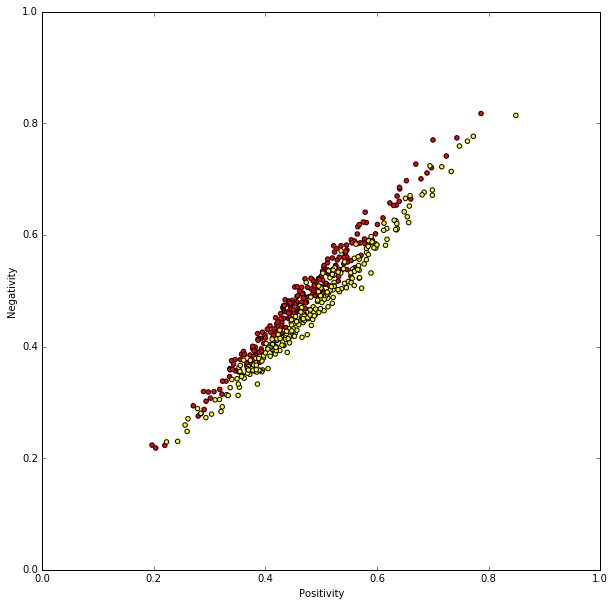

In [321]:
# plot full of testing docs (note: scale axis to 0-1)
plt.figure(figsize=(10,10))

plt.scatter(pvec*(100/8), nvec*(100/8), 20, c=[testDocs.target], cmap = 'autumn')
plt.xlabel('Positivity')
plt.ylabel('Negativity')
plt.xlim(0,1)
plt.ylim(0,1)

(0.2, 0.8)

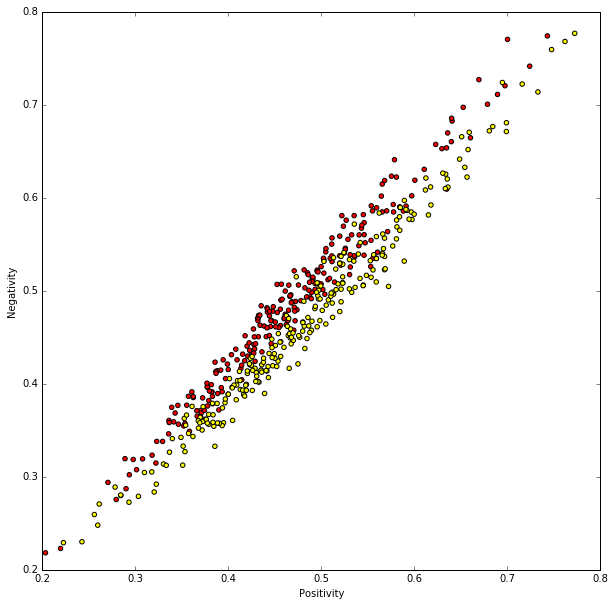

In [320]:
# plot zoom of testing docs (note: scale axis to 0-1)
plt.figure(figsize=(10,10))

plt.scatter(pvec*(100/8), nvec*(100/8), 20, c=[testDocs.target], cmap = 'autumn')
plt.xlabel('Positivity')
plt.ylabel('Negativity')
plt.xlim(0.2,.8)
plt.ylim(0.2,.8)

(0.3, 0.7)

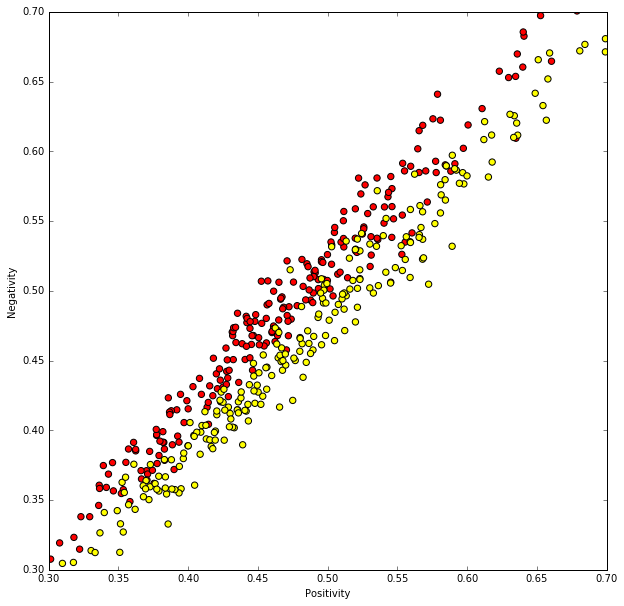

In [319]:
# plot zoom-zoom of testing docs (note: scale axis to 0-1)
plt.figure(figsize=(10,10))

plt.scatter(pvec*(100/8), nvec*(100/8), 40, c=[testDocs.target], cmap = 'autumn')
plt.xlabel('Positivity')
plt.ylabel('Negativity')
plt.color = ['red', 'yellow']
plt.xlim(0.3,0.7)
plt.ylim(0.3,0.7)

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 3".